In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
data = pd.read_csv('AV.csv')
data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,0.0,0.0,37379,11000.0,0,0,0,0.0,Sports Car
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,1.0,0.0,10238,9000.0,0,0,0,1.0,HatchBack
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,1.0,1.0,10238,12000.0,0,0,0,1.0,Sedan
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,0.0,1.0,92099,6000.0,1,0,0,1.0,Sedan
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,1.0,1.0,32122,15000.0,0,0,1,0.0,Sedan


In [10]:
data.shape

(105000, 18)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   105000 non-null  int64  
 1   AGE                  105000 non-null  object 
 2   GENDER               105000 non-null  object 
 3   DRIVING_EXPERIENCE   105000 non-null  object 
 4   EDUCATION            105000 non-null  object 
 5   INCOME               105000 non-null  object 
 6   CREDIT_SCORE         105000 non-null  float64
 7   VEHICLE_OWNERSHIP    105000 non-null  float64
 8   VEHICLE_YEAR         105000 non-null  object 
 9   MARRIED              105000 non-null  float64
 10  CHILDREN             105000 non-null  float64
 11  POSTAL_CODE          105000 non-null  int64  
 12  ANNUAL_MILEAGE       105000 non-null  float64
 13  SPEEDING_VIOLATIONS  105000 non-null  int64  
 14  DUIS                 105000 non-null  int64  
 15  PAST_ACCIDENTS   

In [12]:
data.isna().sum()

ID                     0
AGE                    0
GENDER                 0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
TYPE_OF_VEHICLE        0
dtype: int64

In [13]:
data.nunique()

ID                      98485
AGE                         4
GENDER                      2
DRIVING_EXPERIENCE          4
EDUCATION                   3
INCOME                      4
CREDIT_SCORE           104976
VEHICLE_OWNERSHIP           2
VEHICLE_YEAR                2
MARRIED                     2
CHILDREN                    2
POSTAL_CODE             10937
ANNUAL_MILEAGE             20
SPEEDING_VIOLATIONS        21
DUIS                        7
PAST_ACCIDENTS             16
OUTCOME                     2
TYPE_OF_VEHICLE             4
dtype: int64

In [41]:
categorical_features = list(data.select_dtypes(include=['object']).columns)
categorical_features

['AGE',
 'GENDER',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'TYPE_OF_VEHICLE']

In [14]:
for col in data.iloc[:,2:]:
    if data[col].dtypes == 'O':
        print(col)
        print(data[col].unique())

GENDER
['female' 'male']
DRIVING_EXPERIENCE
['20-29y' '30y+' '0-9y' '10-19y']
EDUCATION
['university' 'high school' 'none']
INCOME
['middle class' 'upper class' 'working class' 'poverty']
VEHICLE_YEAR
['after 2015' 'before 2015']
TYPE_OF_VEHICLE
['Sports Car' 'HatchBack' 'Sedan' 'SUV']


In [63]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [104]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
le = OrdinalEncoder()
sa = le.fit_transform(data_enc[categorical_features])

In [105]:
sa

array([[2., 0., 2., ..., 0., 0., 3.],
       [1., 1., 2., ..., 0., 1., 0.],
       [2., 1., 2., ..., 0., 1., 2.],
       ...,
       [0., 1., 1., ..., 2., 0., 2.],
       [2., 0., 2., ..., 3., 1., 0.],
       [3., 0., 2., ..., 2., 0., 0.]])

In [117]:
preprocessor = ColumnTransformer(
    transformers=[
#         ("num", numeric_transformer, numeric_features),
        ("cat", OrdinalEncoder(), categorical_features)
    ], remainder='passthrough'
)

In [120]:
data_enc=data.copy()
preprocessor.fit_transform(data_enc).shape

(105000, 18)

In [89]:
data_enc[categorical_features] = preprocessor.fit_transform(data_enc[categorical_features])

In [111]:
data_enc[:] = preprocessor.fit_transform(data_enc)

In [112]:
data_enc

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,TYPE_OF_VEHICLE
0,2.0,0.0,2.0,2.0,0.0,0.0,3.0,816393.0,0.638050,0.0,0.0,0.0,37379.0,11000.0,0.0,0.0,0.0,0.0
1,1.0,1.0,2.0,0.0,0.0,1.0,0.0,251762.0,0.475741,1.0,1.0,0.0,10238.0,9000.0,0.0,0.0,0.0,1.0
2,2.0,1.0,2.0,1.0,0.0,1.0,2.0,481952.0,0.839817,1.0,1.0,1.0,10238.0,12000.0,0.0,0.0,0.0,1.0
3,2.0,1.0,2.0,0.0,2.0,1.0,2.0,3506.0,0.682527,1.0,0.0,1.0,92099.0,6000.0,1.0,0.0,0.0,1.0
4,2.0,0.0,2.0,1.0,3.0,0.0,2.0,498013.0,0.572184,1.0,1.0,1.0,32122.0,15000.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,3.0,0.0,0.0,0.0,2.0,1.0,1.0,19557.0,0.672255,1.0,0.0,0.0,31885.0,9000.0,2.0,0.0,0.0,0.0
104996,2.0,0.0,0.0,1.0,3.0,0.0,2.0,222459.0,0.514193,1.0,1.0,0.0,32277.0,10000.0,0.0,0.0,0.0,1.0
104997,0.0,1.0,1.0,1.0,2.0,0.0,2.0,83089.0,0.461942,1.0,1.0,0.0,34800.0,11000.0,0.0,0.0,0.0,1.0
104998,2.0,0.0,2.0,0.0,3.0,1.0,0.0,984879.0,0.483571,1.0,0.0,0.0,10238.0,10000.0,0.0,0.0,0.0,0.0


In [ ]:
transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [0, 1])])
# transform training data
train_X = transformer.fit_transform(train_X)

In [ ]:
pipe = Pipeline([('encoding', StandardScaler())])

In [15]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="Pandas Profiling Report")

In [69]:
profile = ProfileReport(data, title="Pandas Profiling Report",explorative=True)

In [17]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\Msc 2\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [121]:
import seaborn as sns

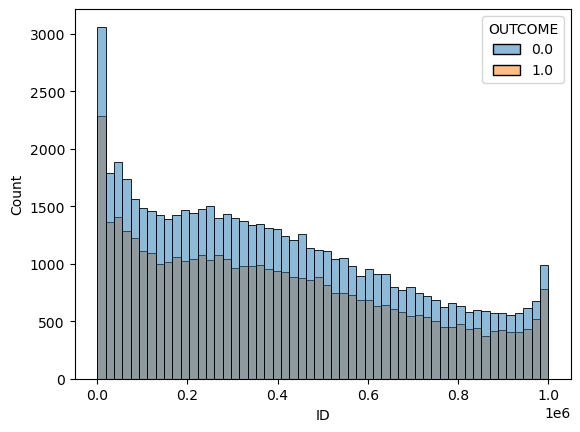

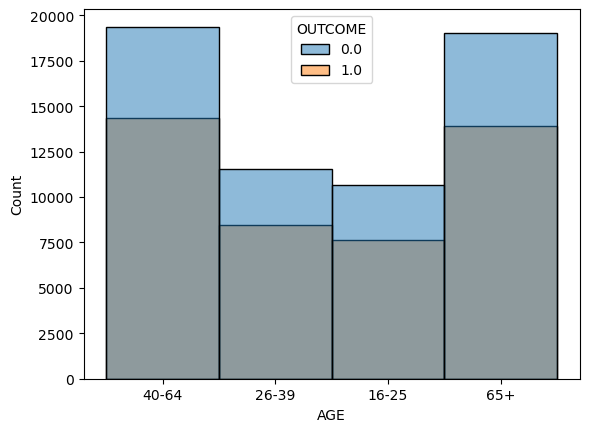

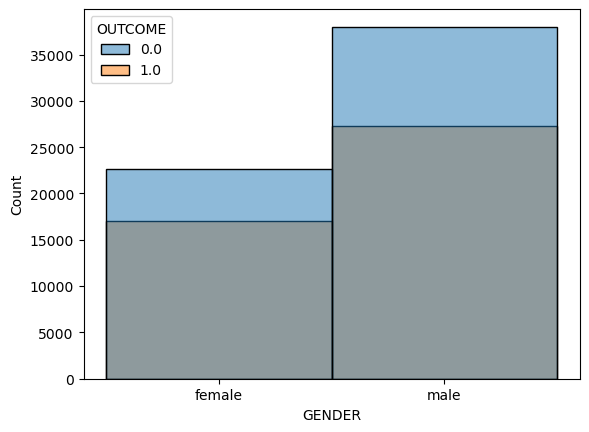

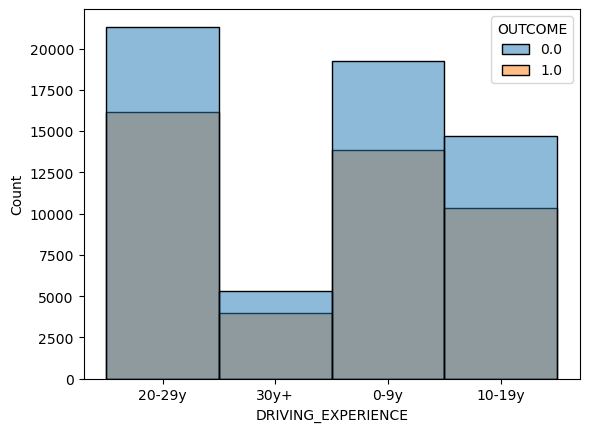

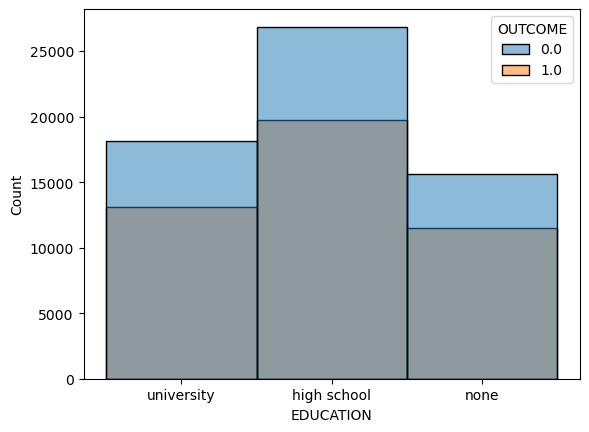

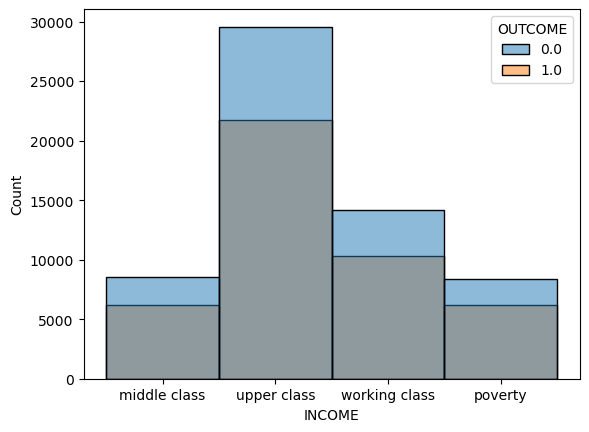

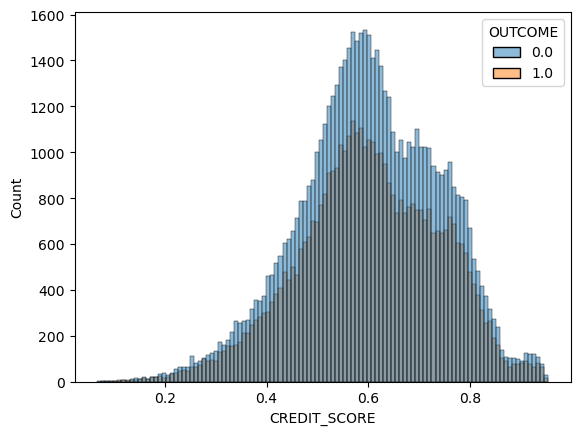

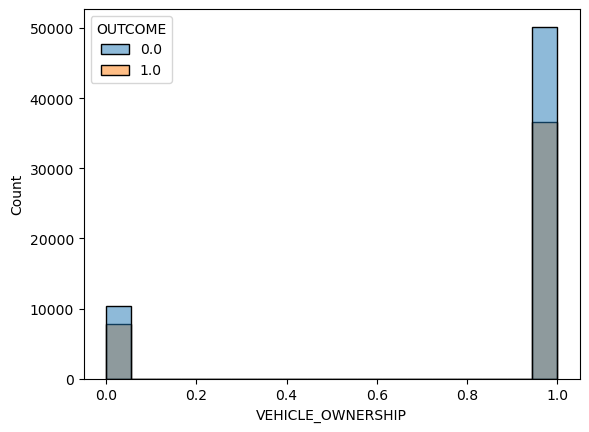

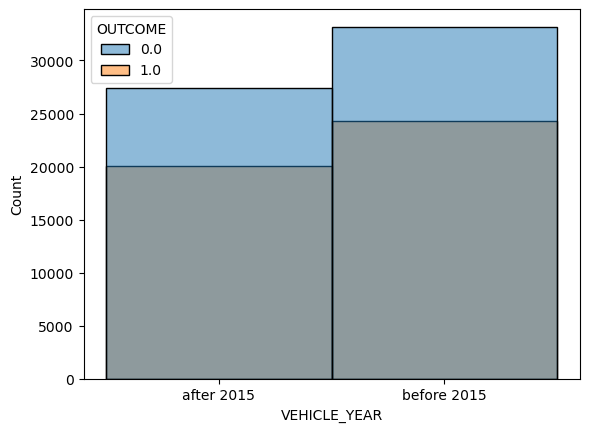

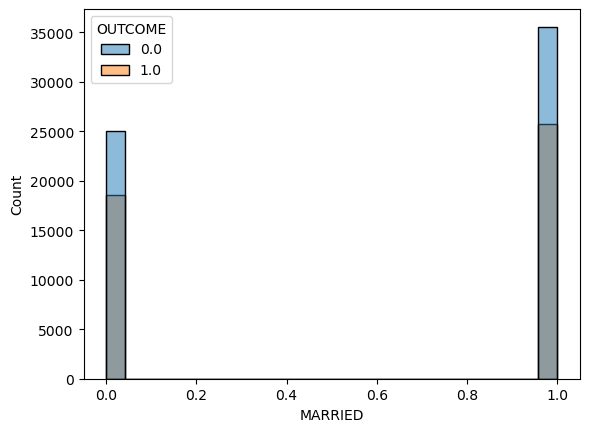

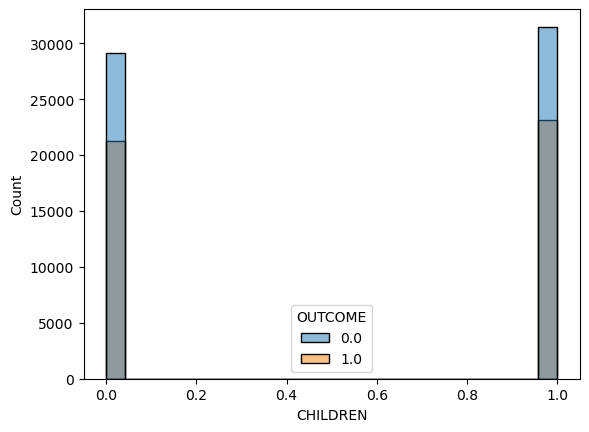

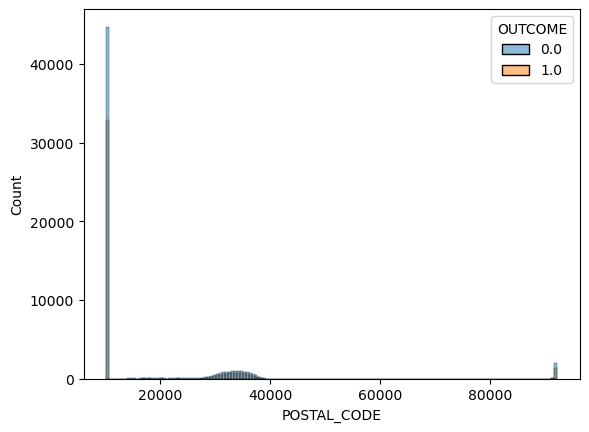

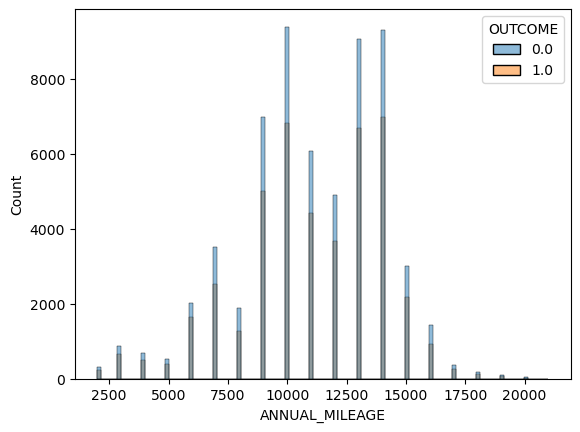

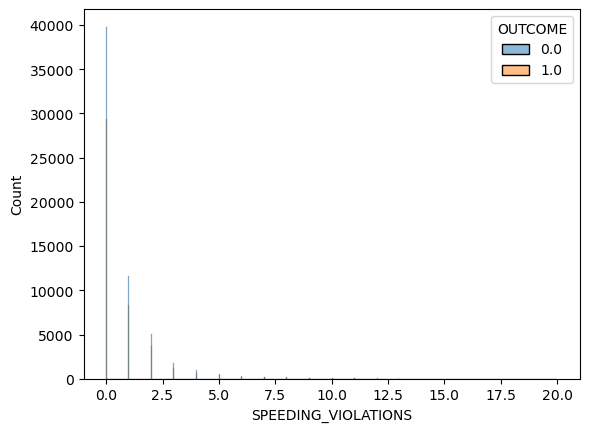

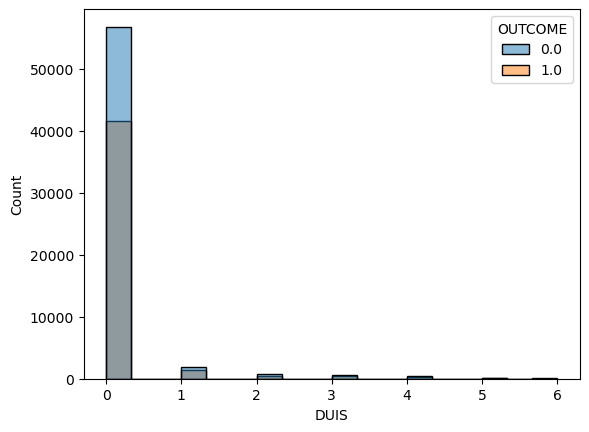

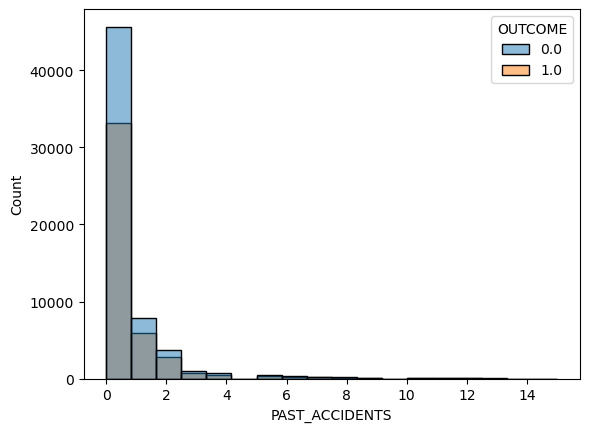

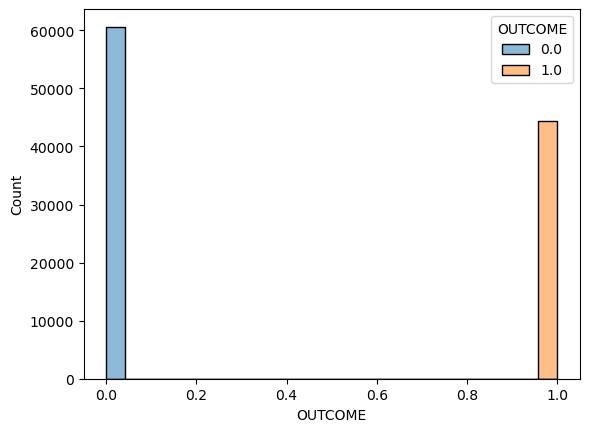

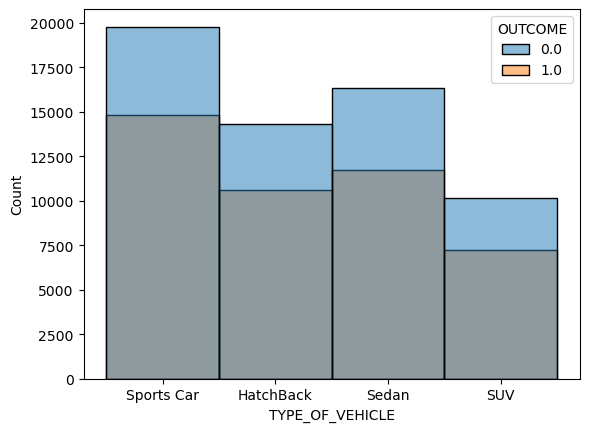

In [136]:
for col in data:
    sns.histplot(x=col, data=data, hue='OUTCOME')
    plt.show()

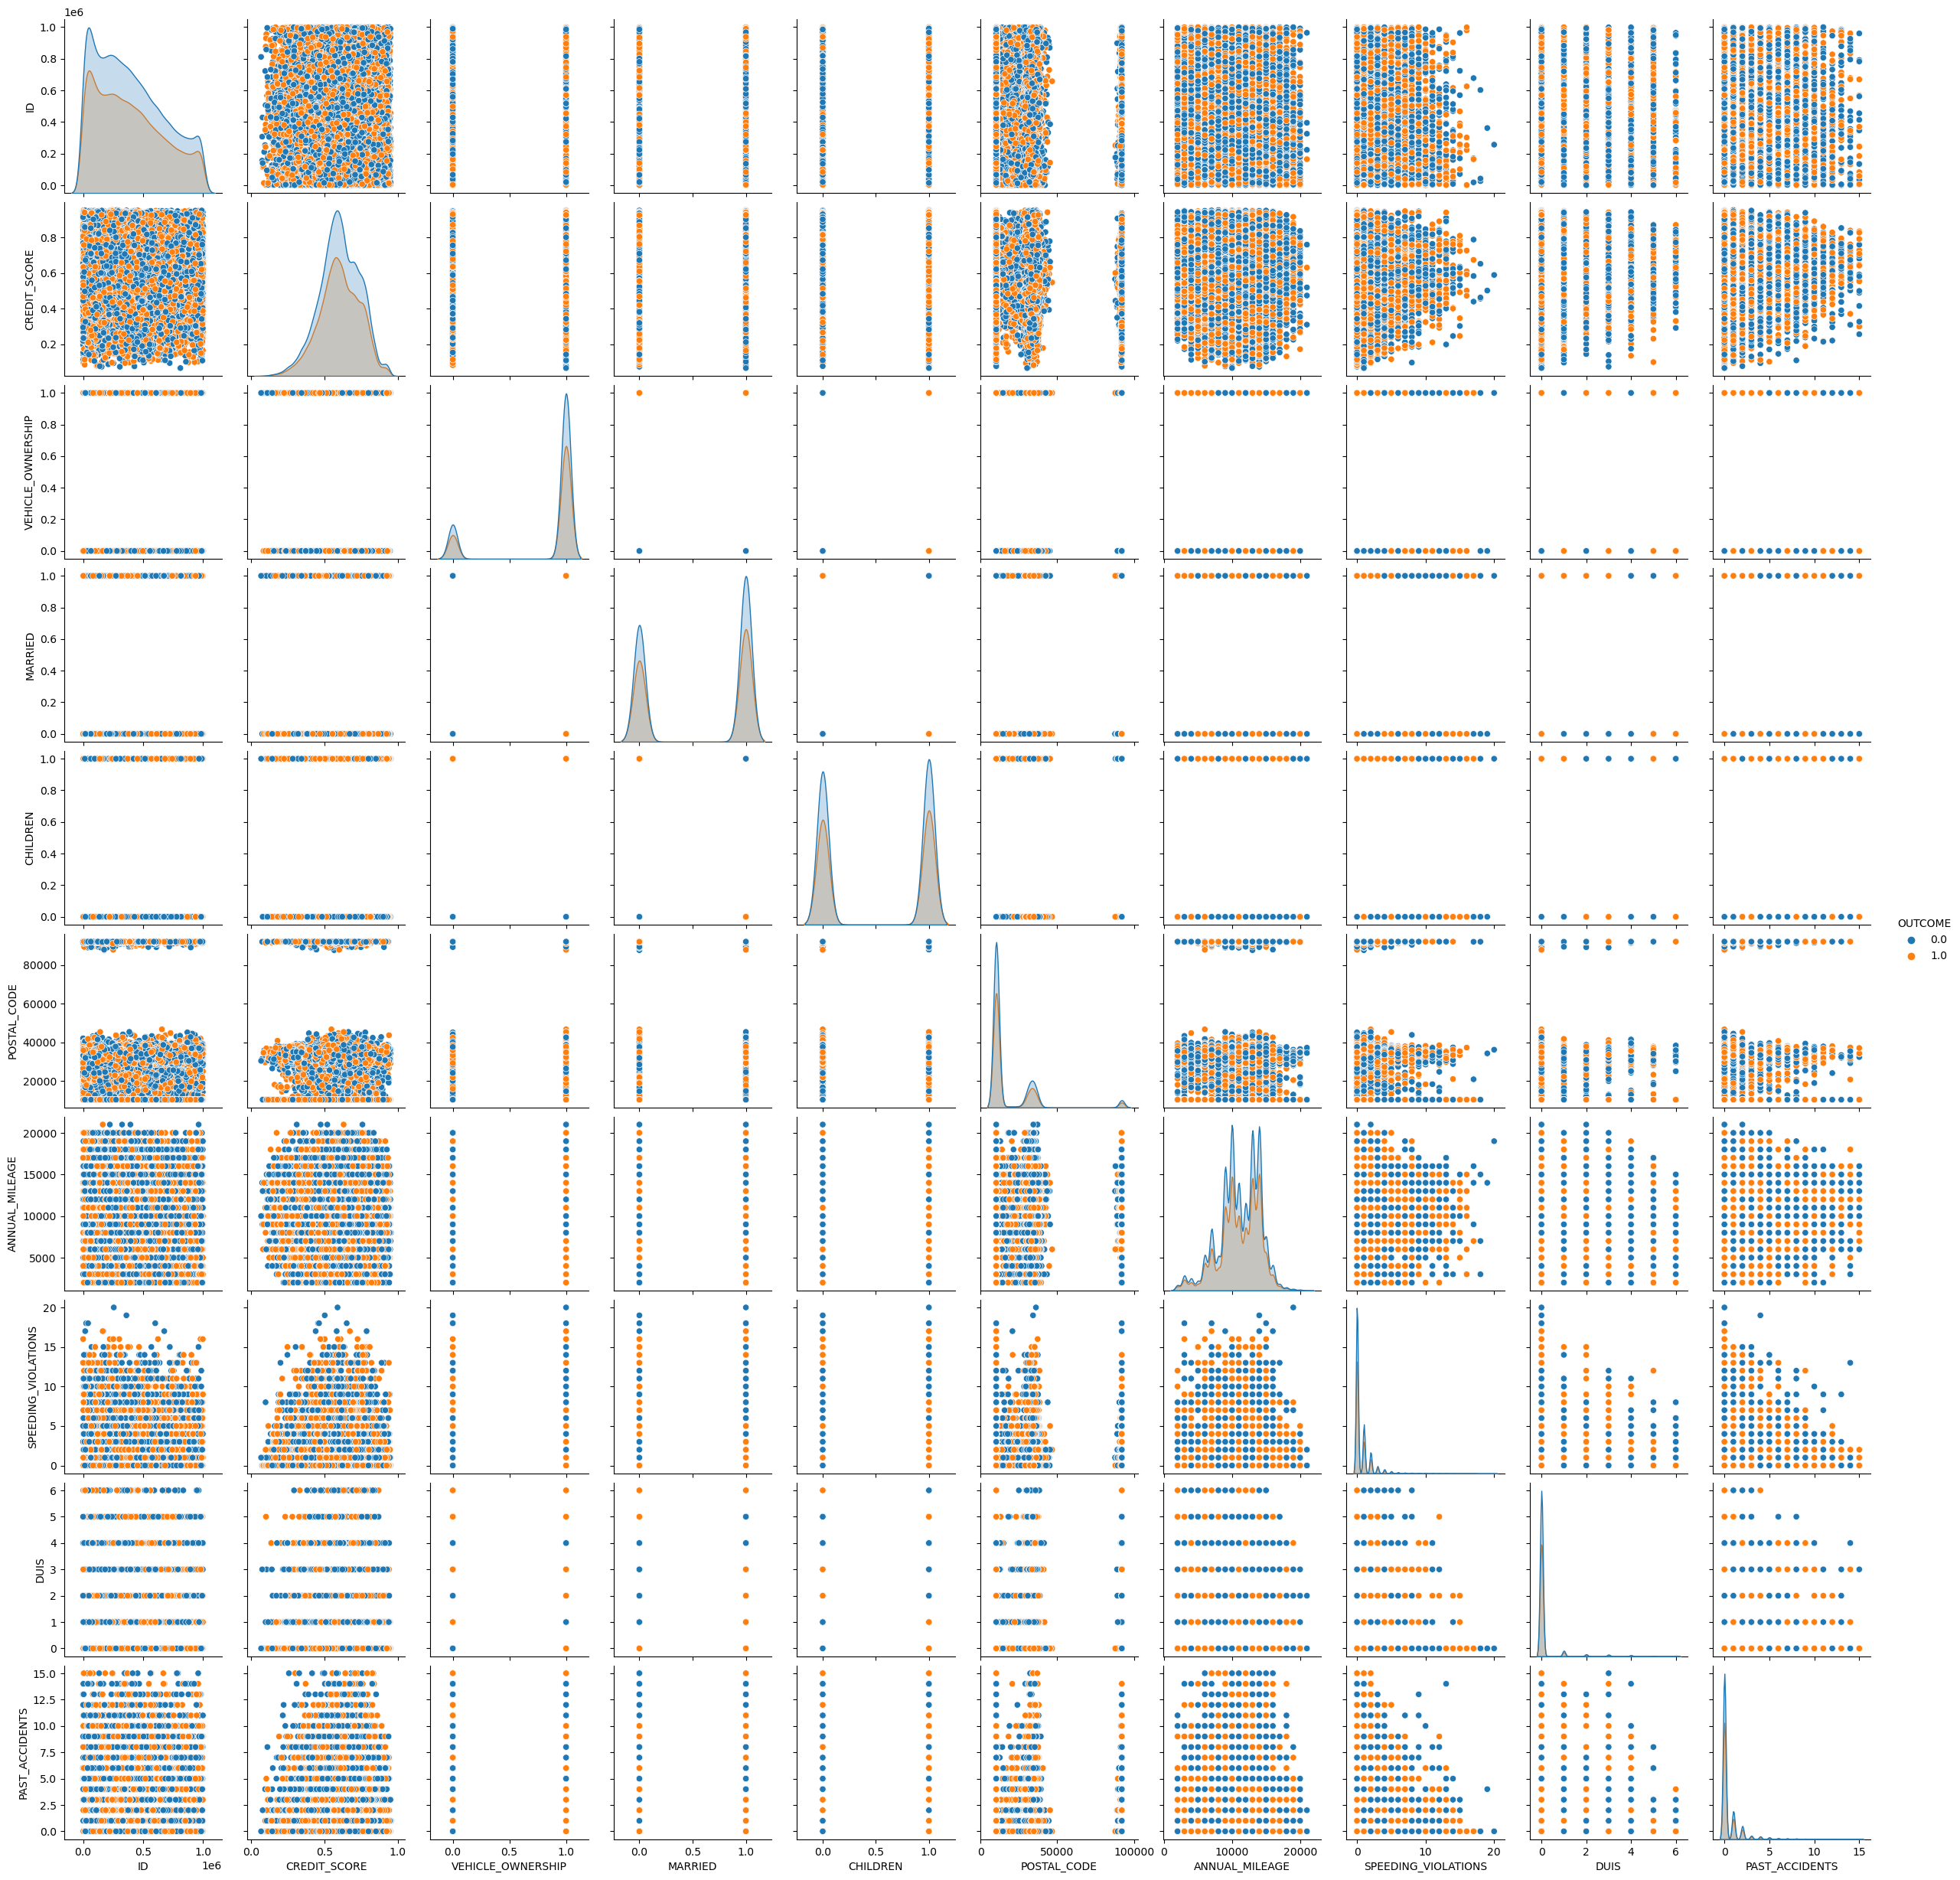

In [137]:
sns.pairplot(data=data, hue='OUTCOME')
plt.show()

In [147]:
numerical_features = list(set(data.columns)-set(categorical_features)-{'ID','OUTCOME','POSTAL_CODE','MARRIED','CHILDREN'})
numerical_features

['PAST_ACCIDENTS',
 'CREDIT_SCORE',
 'SPEEDING_VIOLATIONS',
 'VEHICLE_OWNERSHIP',
 'ANNUAL_MILEAGE',
 'DUIS']